<a href="https://colab.research.google.com/github/RivadeneiraLeonEida11/-Pr-ctica-con-Listas-en-Python/blob/main/Copia_de_Cuchillo_cuchara_tenedor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

In [ ]:
%cd cuchillos
!unzip cuchillos.zip
%cd ..

%cd tenedores
!unzip tenedores.zip
%cd ..

%cd cucharas
!unzip cucharas.zip
%cd ..

/content/cuchillos
Archive:  cuchillos.zip
   creating: cuchillos/
  inflating: cuchillos/-galucho-hueso-alpaca-sku-gal-hain-20-1-cf211d24-8f79-4ccd-947c-ac26f08210db.jpg  
  inflating: cuchillos/0002426_caja-de-exhibicion-de-cuchillos-de-cuello-de-combate-humvee_550.jpg  
  inflating: cuchillos/001-300x300.jpg  
  inflating: cuchillos/002308_4.jpg  
  inflating: cuchillos/1-11.jpg      
  inflating: cuchillos/1063780126.jpg  
  inflating: cuchillos/1155811303.jpg  
  inflating: cuchillos/1654046440162.png  
  inflating: cuchillos/17060189960.jpg  
  inflating: cuchillos/200446-2.jpg  
  inflating: cuchillos/3C-UNIBLOCK-COLECCION_N.jpg  
  inflating: cuchillos/5161-M.jpg    
  inflating: cuchillos/6cef923426a247c4b5b3568d97ddd21b.jpg  
  inflating: cuchillos/71e3ll3krTL._AC_SL1500_.jpg  
  inflating: cuchillos/71ywHZiGYaL._UF8941000_QL80_.jpg  
  inflating: cuchillos/81DtItlIaIL._AC_SL1500_.jpg  
  inflating: cuchillos/81EN6WmLkZL._UF8941000_QL80_.jpg  
  inflating: cuchillos/840101506

In [ ]:
!rm -rf /content/cucharas/cucharas.zip
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/tenedores/tenedores.zip

In [ ]:
!ls /content/cucharas/cucharas | wc -l
!ls /content/cuchillos/cuchillos | wc -l
!ls /content/tenedores/tenedores | wc -l

740
743
623


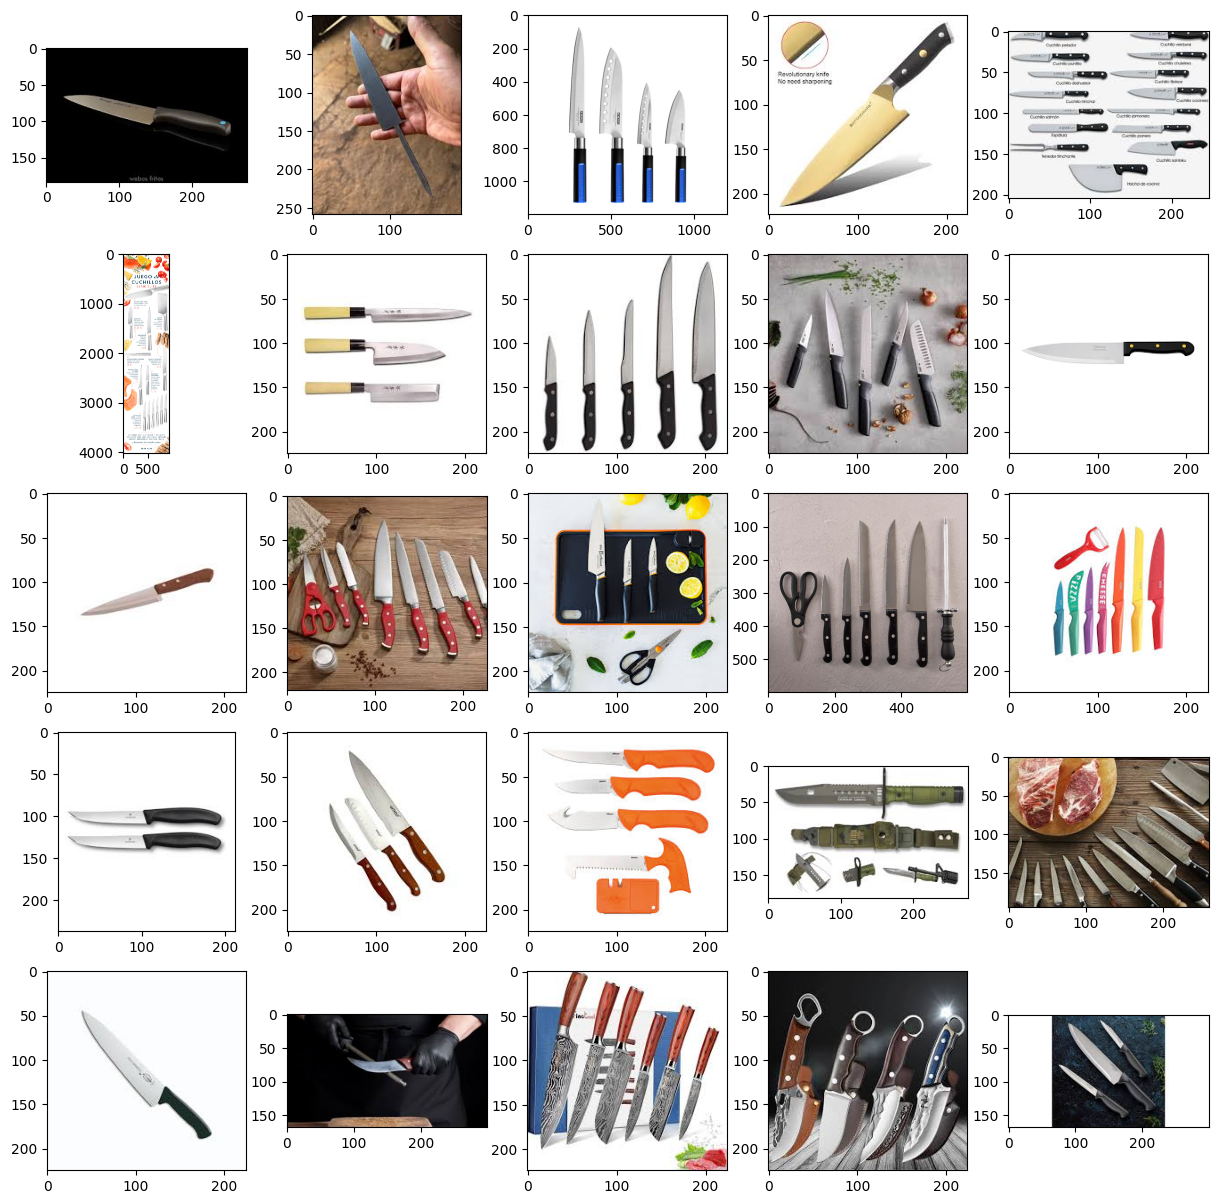

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/cuchillos/cuchillos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/cuchillo
!mkdir dataset/tenedores
!mkdir dataset/cucharas

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes


import shutil
carpeta_fuente = '/content/cucharas/cucharas'
carpeta_destino = '/content/dataset/cucharas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 623:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/tenedores/tenedores'
carpeta_destino = '/content/dataset/tenedores'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 623:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/cuchillos/cuchillos'
carpeta_destino = '/content/dataset/cuchillo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 623:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls /content/dataset/cucharas | wc -l
!ls /content/dataset/cuchillo | wc -l
!ls /content/dataset/tenedores | wc -l

623
623
623


In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

Found 1497 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


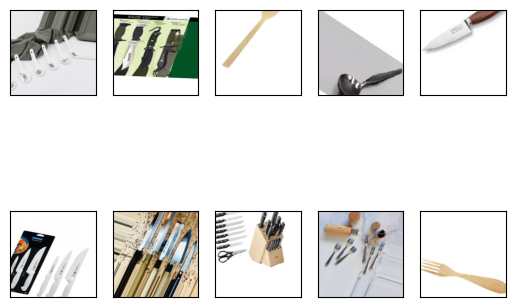

In [ ]:
#Generadores para sets de entrenamiento y pruebas
from matplotlib import pyplot as plt
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# URL del modelo
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

#Congelar el modelo descargado
mobilenetv2.trainable = False

modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])


modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub

In [ ]:
pip install tf_keras

In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.6907

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


47/47 [==============================] - 52s 1s/step - loss: 0.7258 - accuracy: 0.6907 - val_loss: 0.5328 - val_accuracy: 0.8172
Epoch 2/50
47/47 [==============================] - 46s 989ms/step - loss: 0.4847 - accuracy: 0.8083 - val_loss: 0.4763 - val_accuracy: 0.8145
Epoch 3/50
47/47 [==============================] - 46s 991ms/step - loss: 0.4234 - accuracy: 0.8236 - val_loss: 0.4545 - val_accuracy: 0.8091
Epoch 4/50
47/47 [==============================] - 47s 1s/step - loss: 0.3875 - accuracy: 0.8477 - val_loss: 0.4378 - val_accuracy: 0.8172
Epoch 5/50
47/47 [==============================] - 46s 970ms/step - loss: 0.3842 - accuracy: 0.8430 - val_loss: 0.4582 - val_accuracy: 0.8333
Epoch 6/50
47/47 [==============================] - 47s 1s/step - loss: 0.3911 - accuracy: 0.8557 - val_loss: 0.4537 - val_accuracy: 0.7957
Epoch 7/50
47/47 [==============================] - 52s 1s/step - loss: 0.3502 - accuracy: 0.8570 - val_loss: 0.4394 - val_accuracy: 0.8253
Epoch 8/50
47/47 [====

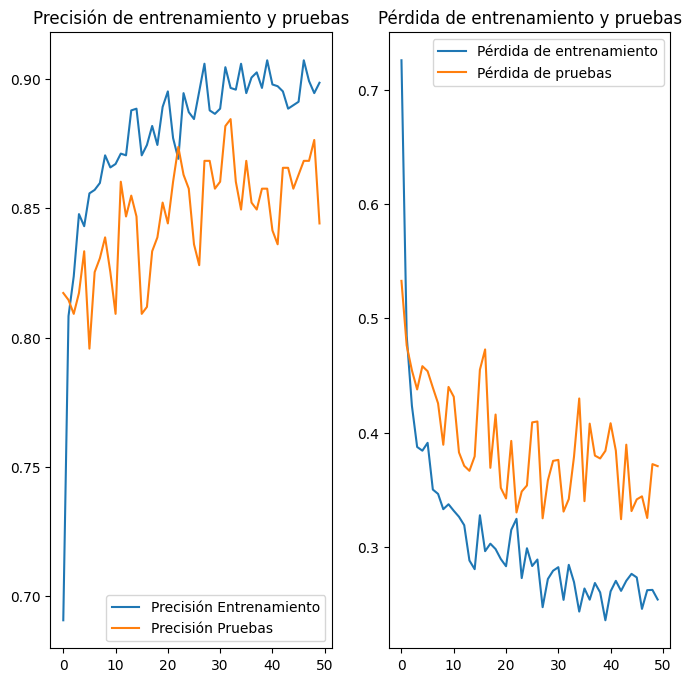

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
#0 = cuchara, 1 = cuchillo, 2 = tenedor
url = 'https://lacasadelassetas.com/blog/wp-content/uploads/2023/06/cuchillos-de-supervivencia-01.jpg' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 371ms/step
1
